In [7]:
import os

print(os.getcwd())


/home/jovyan/work/persistent/BioCycle


In [8]:
#!pip install spectral
#!pip install PyQt5
import spectral
import spectral.io.aviris as aviris
import PyQt5
import numpy as np
import seaborn as sns
from scipy.signal import savgol_filter
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

from config import config
import helpers

In [9]:
PATH = config.paths.path_wd
sample = "p6bb-rs_blumentoepfe_2022-03-09_07-55-05"


In [10]:
image = helpers.get_hsi_capture(sample)

/opt/conda/lib/python3.10/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
INFO:helpers:	Data Source:   './data/p6bb-rs_blumentoepfe_2022-03-09_07-55-05/capture/REFLECTANCE_p6bb-rs_blumentoepfe_2022-03-09_07-55-05.dat'
	# Rows:            859
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


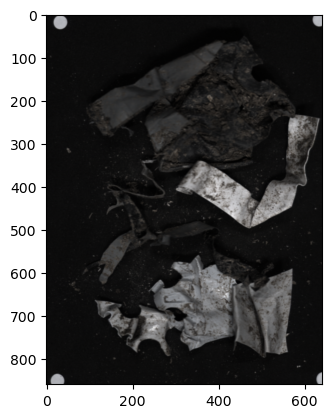

In [15]:
%matplotlib inline
view = spectral.imshow(image, (28,19,9))

In [12]:
def f(x, y, p1, p2):
    #plt.figure(figsize=(10,6))
    filtered = savgol_filter(image[p1,p2], x, y)
    sns.lineplot(data=image[p1,p2])
    sns.lineplot(data=filtered)
    plt.title(f'Hyperspectrum at Position [{p1},{p2}]')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Reflectance')
    plt.legend(labels=['Original', 'Smoothed'])
    plt.show()
    
    #plt.figure(figsize=(10,6))
    filtered = savgol_filter(np.gradient(image[p1,p2]), x, y)
    sns.lineplot(data=np.gradient(image[p1,p2]))
    sns.lineplot(data=filtered)
    plt.title(f'1st Derivative Hyperspectrum at Position [{p1},{p2}]')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Gradient')
    plt.legend(labels=['Original', 'Smoothed'])
    plt.show()
    return 
    
x = IntSlider(min=4, max=100, description='Window:')
y = IntSlider(min=2, max=100, description='Poly size:')
p1 = IntSlider(min=0, max=image.shape[0], description='Position x:')
p2 = IntSlider(min=0, max=image.shape[1], description='Position y:')

interact(f, x=x, y=y, p1=p1, p2=p2);

interactive(children=(IntSlider(value=4, description='Window:', min=4), IntSlider(value=2, description='Poly s…